In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Hz = np.ones((10,10))

In [3]:
from math import pi
from numpy import sqrt

eps0 = 8.85418782e-12
miu0 = 4*pi*1e-7
c0 = 1/sqrt(miu0*eps0)

In [11]:
# NBUFF   = [5, 5, 5, 5];
# NLAM    = 25;
# NDIM    = 3;

# NCELL   = [18 18];
# CELLS   = [6 10];

In [12]:
!pip install fdtd

In [13]:
import fdtd

In [14]:
fdtd.set_backend("numpy")

```python
fdtd.Grid(
    shape,
    grid_spacing: float = 155e-9,
    permittivity: float = 1.0,
    permeability: float = 1.0,
    courant_number: float = None,
)
```

In [38]:
grid = fdtd.Grid(
    shape = (25e-6, 15e-6, 1), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
)

In [39]:
grid

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)

```python
fdtd.LineSource(
    period: Number = 15, # timesteps or seconds
    amplitude: float = 1.0,
    phase_shift: float = 0.0,
    name: str = None,
)
```

In [24]:
grid[7.5e-6:8.0e-6, :, 0] = fdtd.LineSource(
    period = 1550e-9 / (3e8), name="source"
)

```python
fdtd.PML(
    a: float = 1e-8, # stability factor
    name: str = None
)
```

In [25]:
grid

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)

In [26]:
# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [27]:
grid

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)

In [29]:
grid[13e-6:18e-6, 5e-6:8e-6, 0] = fdtd.Object(permittivity=1.5**2)

In [30]:
grid[11:32, 30:84, 0] = fdtd.Object(permittivity=1.7**2, name="object")

In [31]:
print(grid)

Grid(shape=(161,97,1), grid_spacing=1.55e-07, courant_number=0.70)

sources:
    LineSource(period=14, amplitude=1.0, phase_shift=0.0, name='source')
        @ x=[48, ... , 51], y=[76, ... , 83], z=[0, ... , 0]

boundaries:
    PML(name='pml_xlow')
        @ x=0:10, y=:, z=:
    PML(name='pml_xhigh')
        @ x=-10:, y=:, z=:
    PML(name='pml_ylow')
        @ x=:, y=0:10, z=:
    PML(name='pml_yhigh')
        @ x=:, y=-10:, z=:

objects:
    Object(name=None)
        @ x=84:116, y=32:52, z=0:1
    Object(name='object')
        @ x=11:32, y=30:84, z=0:1



In [32]:
1.55e-7 * 75

1.1625e-05

In [33]:
grid[12e-6, :, 0] = fdtd.LineDetector(name="detector")

In [35]:
grid.reset()
grid.run(total_time=100)

100%|██████████| 100/100 [00:00<00:00, 459.16it/s]


```python
grid.visualize(
    grid,
    x=None,
    y=None,
    z=None,
    cmap="Blues",
    pbcolor="C3",
    pmlcolor=(0, 0, 0, 0.1),
    objcolor=(1, 0, 0, 0.1),
    srccolor="C0",
    detcolor="C2",
    show=True,
)
```

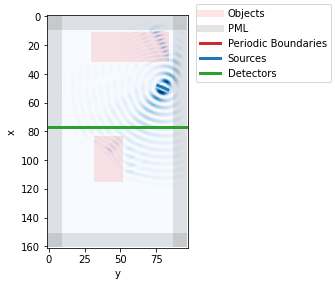

In [37]:
import matplotlib.pyplot as plt
grid.visualize(z=0, show=True)